In [1]:
import numpy as np
import utils
import linear
import pandas as pd
import scipy
import math
import scipy
import matplotlib.pyplot as plt
from itertools import permutations
import random

In [11]:
utils.set_random_seed(1)
B_true = utils.simulate_dag(30, 30, "ER")
W_true = utils.simulate_parameter(B_true)
X = utils.simulate_linear_sem(W_true, 29, "gauss", noise_scale=np.random.uniform(0.5, 5, 30))
linear.notears_linear(X, lambda1=0, loss_type="l2", W_true=W_true)

(61.95691602328951,
 61.95691602328951,
 61.95915294043182,
 61.96716199255111,
 6.68867272679563e-09)

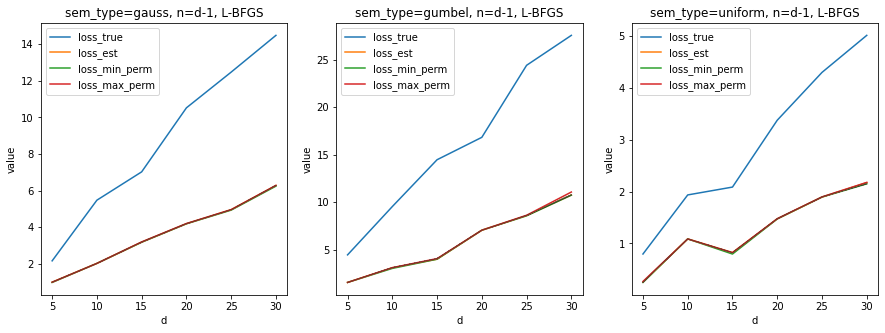

In [2]:
semtypes = ["gauss", "gumbel", "uniform"]
ds = [5, 10, 15, 20, 25, 30]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]
for i, sem_type in enumerate(semtypes):
    result_d = np.zeros([len(ds), len(loss_f)+100])
    for j, d in enumerate(ds):
        result = pd.read_csv("./results_loss2/result_"+str(5000)+"_"+sem_type+"_"+str(d)+".csv")
        result_d[j, :2] = result.iloc[:2, 0]
        min_ind = np.argmin(result.iloc[2:, 0]) + 2
        result_d[j, 2] = result.iloc[min_ind, 0]
        max_ind = np.argmax(result.iloc[2:, 0]) + 2
        result_d[j, 3] = result.iloc[max_ind, 0]
        for k in range(100):
            result_d[j, k+4] = result.iloc[k+2, 0]

    ax = axs[i]
    for p in range(4):
        if p >-1:
            ax.plot(ds, result_d[:,p], marker='', label=loss_f[p], color=colormap(p))
    for p in range(100):
        ax.plot(ds, result_d[:,p+4], marker='', alpha=0.005, color=colormap(5))
    ax.set_xlabel('d')
    ax.set_ylabel("value")
    ax.set_title(f'sem_type={sem_type}, n=d-1, L-BFGS')
    ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.savefig("./results_loss2/loss_perm_1.png")
plt.suptitle
plt.show()

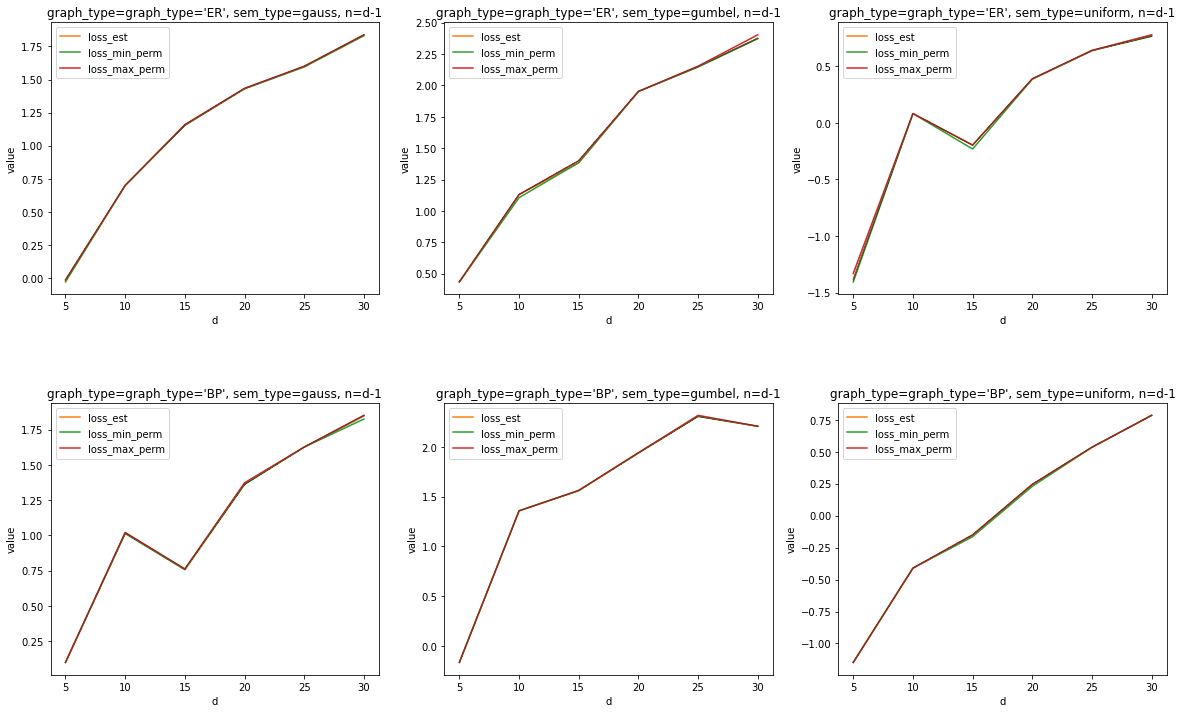

In [3]:
semtypes = ["gauss", "gumbel", "uniform"]
ds = [5, 10, 15, 20, 25, 30]
graphtypes = ["ER", "BP"]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]
for g, graph_type in enumerate(graphtypes):
    for i, sem_type in enumerate(semtypes):
        result_d = np.zeros([len(ds), len(loss_f)+100])
        for j, d in enumerate(ds):
            result = pd.read_csv("./results_loss2/result_"+str(int(5000+3*g))+"_"+sem_type+"_"+str(d)+".csv")
            result_d[j, :2] = result.iloc[:2, 0]
            min_ind = np.argmin(result.iloc[2:, 0]) + 2
            result_d[j, 2] = result.iloc[min_ind, 0]
            max_ind = np.argmax(result.iloc[2:, 0]) + 2
            result_d[j, 3] = result.iloc[max_ind, 0]
            for k in range(100):
                result_d[j, k+4] = result.iloc[k+2, 0]

        ax = axs[g, i]
        for p in range(4):
            if p >0:
                ax.plot(ds,np.log(result_d[:,p]), marker='', label=loss_f[p], color=colormap(p))
        for p in range(100):
            ax.plot(ds, np.log(result_d[:,p+4]), marker='', alpha=0.005, color=colormap(5))
        ax.set_xlabel('d')
        ax.set_ylabel("value")
        ax.set_title(f'graph_type={graph_type=}, sem_type={sem_type}, n=d-1')
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.savefig("./results_loss2/loss_perm_3.png")
plt.show()